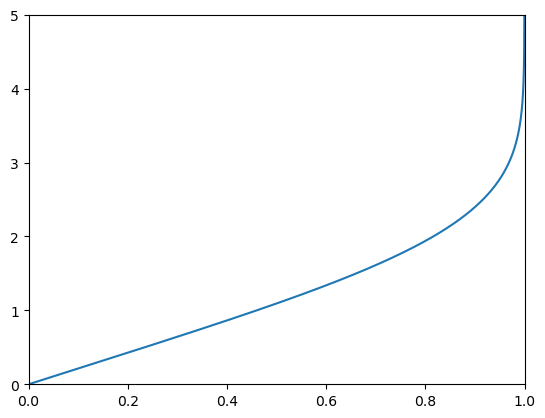

In [22]:
from bl import *
import numpy as np
import matplotlib.pyplot as plt

class ODEs():
    def __init__(self, odefun, tspan):
        self.odefun = odefun
        self.tspan = tspan

    def eu_solve(self, y0):
        order = len(y0)
        t_length = len(self.tspan)
        dt = self.tspan[1] - self.tspan[0]

        y = np.zeros((t_length, order))
        y[0, :] = y0

        for i in range(t_length - 1):
            for j in range(order):
                y[i + 1, j] = y[i, j] + self.odefun(tspan[i], y[i, :])[j] * dt
        
        self.y = y   
        return tspan, y
    
    def rk4_solve(self, y0):
        order = len(y0)
        t_length = len(self.tspan)
        dt = self.tspan[1] - self.tspan[0]

        y = np.zeros((t_length, order))
        y[0, :] = y0

        for i in range(t_length - 1):
            for j in range(order):
                
                t = self.tspan[i]
                y_old = y[i, :]
                
                K1 = self.odefun(t, y_old)[j]
                K2 = self.odefun(t + dt/2, y_old + K1*dt/2)[j]
                K3 = self.odefun(t + dt/2, y_old + K2*dt/2)[j]
                K4 = self.odefun(t + dt, y_old + K3*dt)[j]
   
                y[i + 1, j] = y[i, j] + 1/6*(K1 + 2*K2 + 2*K3 + K4)*dt
    
        self.y = y   
        return tspan, y
    
    def plotter(self):
        fig, ax = plt.subplots()
        ax.plot(tspan, y)
        plt.show()
        
    

def f(x, y):
    """ODE-system for the Blasius-equation"""
    return [y[1],y[2], -y[0]*y[2]]


target = 1.0
tspan = np.linspace(0, 10, 10000)
blp = ODEs(f, tspan)



#First Iteration
guess_older = 1.0
blp = ODEs(f, tspan)
t, y = blp.rk4_solve([0, 0, 1])
sol_older = y[-1, 1]

#Second Iteration
guess_old = 0.1
blp = ODEs(f, tspan)
t, y = blp.rk4_solve([0, 0, 0.1])
sol_old = y[-1, 1]


tol = 1e-3
sol = -1000

while abs(target - sol) > tol:
    
    m = (guess_older - guess_old) / (sol_older - sol_old)
    guess = guess_old + m*(target - sol_old)
    blp = ODEs(f, tspan)
    t, y = blp.rk4_solve([0, 0, guess])
    sol = y[-1, 1]
    
    guess_older = guess_old
    guess_old = guess
    
    sol_older = sol_old
    sol_old = sol
    
plt.plot(y[:, 1], t)
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.show()


C:\Users\mtaha\AppData\Local\Temp\ipykernel_15308\1370106041.py:7: RuntimeWarning: invalid value encountered in true_divide
  delta = 5 * x / np.sqrt(Re)


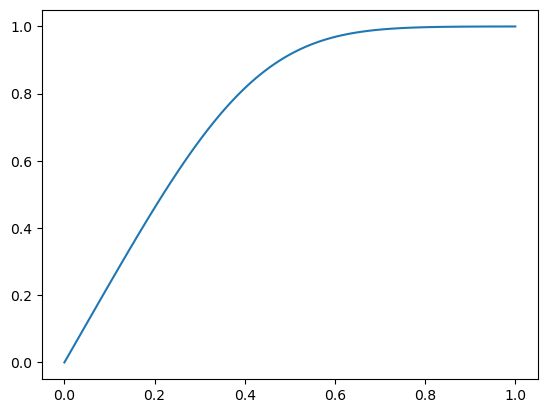

In [25]:
x = np.linspace(0, 1, 100)
Uinf = 1
nu = 1.81e-5

Re = Uinf * x / nu

delta = 5 * x / np.sqrt(Re)

mu = 5 * x / Uinf

# interpolate the mu valus to the tspan
mu = np.interp(mu, t, y[:, 1])

plt.plot(x,mu)
plt.show()